<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Preprocesamiento/Preprocesamiento_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

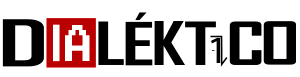

**INTRODUCCIÓN AL PREPROCESAMIENTO DE DATOS** ⚒

# 1. Introducción
En esta práctica **observarás** y **comprenderás** cómo se preprocesa un conjunto de datos con algunas librerías de **Python**, principalmente **Pandas**, la cual nos permite trabajar de forma sencilla con información dispuesta en tablas. 

Ejecutarás código que te ayude a **limpiar**, **transformar** y **reducir** un conjunto de datos para generar uno más comprensible y digerible para la máquina y para quien lo manipule y analice. 

El conjunto de datos que utilizaremos comprende **información real** de características de automóviles, los cuales están dispuestos en una tabla. Para más información sobre estos datos, consúltese el **apéndice** al final de la lección.

# 2. Objetivo
Se nos ha dado la tarea de **analizar los datos** para hallar insights (descubrimientos relevantes), y posteriormente crear un modelo de **machine learning**. Para ello, se nos ha pedido que solo utilicemos las siguientes características de los coches: tipo de combustible, longitud, latitud, anchura, caballos de fuerza y precio. 

Nuestro objetivo será **preprocesar** el conjunto de datos para llevar a cabo estas actividades de manera eficiente.  

# 3. Declaración de librerías y carga de datos
Para cargar  el conjunto de datos a nuestro espacio de trabajo, leeremos un CSV alojado en un repositorio de **GitHub**, el cual extraeremos utilizando la URL del archivo, y almacenaremos en una tabla utilizando la librería Pandas. 

La declaración de las **librerías** que utilizaremos se encuentra al principio del código. 

**Nota**: *Recuerda que para ejecutar las celdas de código solo debes colocarte sobre estas y presionar Shift + Enter, u oprimir el **botón de reproducción**.*

Ejecuta la siguiente celda para cargar los datos y las librerías, y de ahora en adelante, haz lo mismo con todas estas conforme vayan apareciendo:

In [1]:
#Se importan las librerías
import pandas as pd
import sklearn
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

#Se define el tipo de formato de las gráficas
plt.style.use('seaborn-whitegrid')

#Se ignoran las alertas para que no se impriman en la pantalla
warnings.filterwarnings('ignore')

#Se carga el conjunto de datos desde GitHub
dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/Machine-Learning/main/Regresi%C3%B3n%20Lineal/Autom%C3%B3viles.csv')

Comprobamos que la carga se haya realizado correctamente mostrando los primeros cinco renglones de la tabla:

In [ ]:
#Se especifica que se muestren todas las columnas de la tabla.
pd.set_option('display.max_columns', None)

#Se imprimen los primeros cinco renglones.
dataset.head()

# 4. Limpieza de datos
Ahora que hemos cargado nuestro conjunto de datos, comenzaremos su **preprocesamiento** con la primer técnica observada en la [introducción al preprocesamiento](https://dialektico.com/introduccion-preprocesamiento/): la **limpieza de datos**. 

Para esto, primero es necesario visualizar de forma general las características de nuestro conjunto, para lo que utilizaremos la funcion **info()** de Pandas, la cual nos mostrará lo siguiente:  

* Número de renglones y columnas. 
* **Column**: el nombre de cada columna. 

* **Non-Null Count**: el número de valores no nulos, los cuales son los datos válidos, es decir, datos no vacíos o que no generan algún conflicto de lectura.
* **Dtype**: el tipo de datos en el que está categorizada cada columna.


Ejecuta la siguiente celda para ver esta información:

In [ ]:
#Se despliega la información general del conjunto de datos.
dataset.info()

En esta lista nos percatamos de que tenemos **26 columnas y 205 renglones**, y de que en algunas columnas tenemos la presencia de **valores nulos**, ya que el conteo "non-null" no siempre es de 205. 

El ejemplo más claro de esto es el de la columna "normalized-losses", la cual cuenta solo con 164 valores no nulos, indicando un total de 41 valores nulos presentes.

Pero antes de ocuparnos de ello, eliminaremos aquellas columnas que no necesitaremos, dado que solo son necesarias las 6 características mencionadas anteriormente.

Ejectua el siguiente código para mantener solo las columnas con las variables "tipo de combustible", "longitud", "latitud", "anchura", "caballos de fuerza" y "precio".

In [ ]:
#Se mantienen solo las columnas con las características deseadas y se imprime el resultado.
dataset = dataset.loc[:, [' fuel-type', 'length', 'width', 'height', 'horsepower', 'price']]
dataset

Ahora que nuestro conjunto de datos contiene solo las columnas con las que planeamos trabajar, volvemos a imprimir el resumen de nuestra tabla:

In [ ]:
dataset.info()

Como se observa en la salida de esta casilla, ya contamos con solo 6 columnas, de las cuales solo dos cuentan con valores nulos. Dado que se trata solo de 6 renglones con este tipo de valores (solo el 3% de nuestro conjunto de datos), procederemos a eliminar estos utilizando la función **dropna()**:

In [ ]:
#Se eliminan los renglones con valores nulos, y se resetea el índice (primera columna con la numeración) para tener una enumeración correcta.
dataset = dataset.dropna().reset_index(drop = True)
dataset

Notarás que los renglones ahora son 199. 

En el siguiente paso, procederemos a cambiar los títulos de nuestras columnas, con el fin de tener nombres de variables en español para un análisis y visualización más cómoda y consistente:

In [ ]:
#Se renombran las columnas.
dataset = dataset.rename(columns = {' fuel-type': 'Tipo de combustible', 'length': 'Longitud', 'width': 'Anchura', 'height': 'Altura',
                                    'horsepower':'Caballos de fuerza', 'price': 'Precio'})
dataset

Por último, revisaremos la existencia de renglones duplicados con la función **drop_duplicates(**), y en caso de haberlos, los eliminaremos.

In [ ]:
#Se eliminan los renglones repetidos y se resetea el índice de nuevo.
dataset.drop_duplicates(inplace = True)
dataset = dataset.reset_index(drop = True)
dataset

Ahora la cantidad de renglones es de 194, por lo que se eliminaron **5 renglones repetidos**. 

Dado que no es necesario efectuar más modificaciones básicas a nuestro conjunto datos, con esto concluimos su limpieza, y pasamos a la fase de **transformación**.

# 5. Transformación
Como ya hemos [definido](https://dialektico.com/introduccion-preprocesamiento/#transf), la **transformación** de los datos consiste en expresarlos en formas estratégicas para un mejor procesamiento computacional.

Antes de realizar acciones concernientes a esto, desplegaremos estadísticas básicas de nuestro conjunto de datos utilizando la función **describe()**, la cual nos mostrará la siguiente información de cada columna:



*   **Count**: número de valores de cada columna.
*   **Mean**: su promedio.
*   **Std**: su desviación estándar.
*   **Min**: su valor mínimo.
*   **Max**: su valor máximo.
*   **25%, 50%, 75%**: sus percentiles



In [ ]:
#Desplegamos las estadísticas del conjunto de datos.
dataset.describe()

Se puede notar que tenemos la información de todas las columnas excepto la de la variable "Tipo de combustible", ya que no es de tipo numérica (es **[cualitativa](https://dialektico.com/datos-machine-learning/#Dcualit)**).

Como en nuestros **objetivos** se ha establecido que estos datos se utilizarán como entradas para un modelo de aprendizaje automático, los datos de esta columna deberán convertirse a tipo numérico, por lo que utilizaremos la librería **Sklearn** y su función **LabelEncoder()** para esto.

Ejecuta el siguiente fragmento para convertir los valores de la variable "Tipo de combustible" en números enteros:

In [ ]:
#Se declara el codificador.
le = preprocessing.LabelEncoder()

#Se transforman los valores de la columna en enteros.
dataset['Tipo de combustible'] = le.fit_transform(dataset['Tipo de combustible'])
dataset

En esta última tabla se observa la **transformación** de cada valor de la columna "Tipo de combustible" a números enteros. Haciendo una rápida comparación con la columna antes de ser transformada, podemos constatar que los valores iguales a "diesel" se transcribieron como ceros, y los valores iguales a "gas" como unos.

A primera vista, pareciera que solo tenemos dos valores diferentes para esta variable, pero lo comprobaremos utilizando la función **value_counts()** de Pandas, la cual nos indicará el número de diferentes valores de esta columna, y el número de ocurrencias de cada uno.

In [ ]:
n_ceros = dataset['Tipo de combustible'].value_counts()[0]
n_ones = dataset['Tipo de combustible'].value_counts()[1]

print('Hay ' + str(n_ceros) + ' valores iguales a 0.')
print('Hay ' + str(n_ones) + ' valores iguales a 1.')

Ahora que tenemos codificados los valores cualitativos de esta columna, utilizremos las funciones **min()** y **max()** para observar si nuestros valores máximos y mínimos entre variables están muy lejanos los unos de los otros.

In [ ]:
#Se imprimen los valores máximos y mínimos de cada columna.
print('VALORES MÍNIMOS:')
print(dataset.min())
print('\n')

print('VALORES MÁXIMOS:')
print(dataset.max())

Sin contar los valores mínimos y máximos de la primera columna (ya que sabemos que son 0 y 1 respectivamente), se pueden observar valores muy lejanos entre mínimos y máximos de las variables, siendo 47 el mínimo, y 45400 el máximo. 

Para **eficientar el procesamiento** de estos datos en un modelo predictivo, es recomendable colocar todos los datos en un intervalo, es decir, escalarlos para que sus distancias numéricas no sean tales que el algoritmo tome tiempos largos para cumplir su objetivo. A esto también se le llama normalización.

Para realizar esta tarea utilizaremos la función **MinMaxScaler()** de Sklearn:

In [ ]:
#Se declara la clase que escalará nuestros datos.
scaler = preprocessing.MinMaxScaler()

#Se escalan los datos a un intervalo entre 0 y 1.
normalized = scaler.fit_transform(dataset)

#Se toman los valores de las columnas, y se recrea la tabla con los datos escalados.
column_names = dataset.columns
dataset = pd.DataFrame(normalized, columns = column_names)
dataset

El resultado es el conjunto de datos con los números escalados entre 0 y 1, lo cual minimiza las distancias y procura un procesamiento de mayor rendimiento.

# 6. Reducción de datos
Por último en nuestro ejercicio de preprocesamiento, haremos una **reducción de datos** empleando técnicas para eliminar valores atípicos (outliers).

## 6.1 Datos atípicos - Outliers
El tratamiento de los **valores atípicos** es todo un tema que se pueda estudiar aparte, en este caso no ahondaremos en sus métodos y las consideraciones previas a la aplicación de estos, simplemente eliminaremos aquellos datos que se alejen considerablemente de los demás, ya que representan un **comportamiento anormal**.

Para una rápida ilustración de esto, graficaremos los datos de los **caballos de fuerza** de cada coche respecto a su **precio**, utilizando la librería **Matplotlib**. En esta gráfica observarás cómo hay puntos que parecen alejarse demasiado de aquellos que están más agrupados; estos son los datos que vamos a eliminar.

In [ ]:
#Se determinan los datos a graficar, en este caso: el precio y los caballos de fuerza de cada automóvil.
xpoints = dataset['Caballos de fuerza']
ypoints = dataset['Precio']

#Se grafican.
plt.figure(figsize=(7, 7))
plt.plot(xpoints, ypoints, 'o') 
plt.title("PRECIO DE COCHES RESPECTO A CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14})
plt.xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  '#630000', 'weight': 'bold', 'size': 10})
plt.ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  '#630000', 'weight': 'bold', 'size': 10}) 
plt.show()

Para remover los valores atípicos de los caballos de fuerza y el precio, utilizaremos el método del **rango intercuartílico**, el cual es solo una de entre muchas técnicas utilizadas para datos sin **distribuciones normales**. Esto se explicará más a detalle en lecciones posteriores.

A continuación, se muestra la gráfica después de aplicar esta reducción:

In [ ]:
#Se crea una función que calcula los límites superior e inferior del rango intercuartílico.
def iqrFilter(column):
  percentile25 = dataset[column].quantile(0.25)
  percentile75 = dataset[column].quantile(0.75)
  iqr = percentile75 - percentile25
  
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  
  return upper_limit,lower_limit

#Se crea un conjunto de datos temporal para hacer las comparaciones.
dataset_temp = dataset

#Se realiza la detección y eliminación de los valores atípicos en el precio y los caballos de fuerza
for i in ['Precio', 'Caballos de fuerza']:
  upperP,lowerP = iqrFilter(i)
  dataset_temp = dataset_temp[dataset[i] > lowerP]
  dataset_temp = dataset_temp[dataset[i] < upperP]

xpoints = dataset['Caballos de fuerza']
ypoints = dataset['Precio']

t_xpoints = dataset_temp['Caballos de fuerza']
t_ypoints = dataset_temp['Precio']

#Se despliegan ambas gráficas.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

ax1.plot(xpoints, ypoints, 'o')
ax1.set_title("ANTES DE LA REMOCIÓN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14})
ax1.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  '#630000', 'weight': 'bold', 'size': 10})
ax1.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  '#630000', 'weight': 'bold', 'size': 10}) 

ax2.plot(t_xpoints, t_ypoints, 'o')
ax2.set_title("DESPUÉS DE LA REMOCIÓN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14})
ax2.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  '#630000', 'weight': 'bold', 'size': 10})
ax2.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  '#630000', 'weight': 'bold', 'size': 10}) 

plt.show()

En las gráficas es clara la diferencia: en la de la derecha se aprecia cómo han desaparecido los puntos más lejanos a la agrupación de los datos, por lo que se observa un cambio en el rango del eje vertical, cuyo máximo valor ha descendido de 1 a 0.6. 

Habiendo vislumbrado el objetivo de esta eliminación de datos atípicos, se procede a hacer lo mismo para todas las columnas (a excepción de la primera, ya que solo contiene dos posibles valores) y mostrar la tabla resultante:

In [ ]:
for i in dataset.columns[1:6]:
  upperP,lowerP = iqrFilter(i)
  dataset = dataset.loc[dataset[i] > lowerP]
  dataset = dataset.loc[dataset[i] < upperP]

dataset = dataset.reset_index(drop = True)
dataset

En esta última tabla se observa un total de 174 renglones, por lo que el conjunto de datos fue reducido a una versión más estadísticamente significativa. 

En particular, esta tabla ya no necesita ser reducida mediante otro método, y ya hemos aplicado técnicas que son altamente frecuentes en la etapa de preprocesamiento de datos. 

Para visualizar las diferencias entre nuestro conjunto de datos inicial y el preprocesado, a continuación mostraremos ambas tablas.

**Conjunto de datos inicial:**

In [ ]:
prep_dataset = dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/Machine-Learning/main/Regresi%C3%B3n%20Lineal/Autom%C3%B3viles.csv')
dataset

**Conjunto de datos preprocesado:**

In [ ]:
prep_dataset

Así concluye nuestra primera práctica en Python. En esta ocasión, no se propondrán ejercicios, ya que el procesamiento se irá practicando de forma casi ineludible en cada algoritmo de machine learning abordado en el curso.

▶ [Regresar a la lección](https://dialektico.com/introduccion-preprocesamiento/#c%C3%B3digo) 🧙

# 7. Apéndice

## 7.1 Sobre el conjunto de datos
El conjunto de datos utilizado en este ejercicio fue obtenido del Repositorio de Aprendizaje de Máquinas UCI del Centro para Machine Learning e Inteligencia Artificial de la Universidad de California.

Estos datos fueron recolectados por Jeffrey C. Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu), de las siguientes fuentes:

*   1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
*   Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038.
*Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037.

**Atributos y sus rangos**:
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuo de 65 a 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gasolina.
5. aspiration: std, turbo.
6. num-of-doors: cuatro, dos.
7. body-style:: techo duro, wagon, sedán, hatchback, descapotable.
8. drive-wheels: 4x4, fwd, rwd.
9. engine-location: delantero, trasero.
10. wheel-base: continua de 86,6 a 120,9.
11. lenght: continua de 141,1 a 208,1.
12. width: continua de 60,3 a 72,3.
13. height: continua de 47,8 a 59,8.
14. curb-weigh: continuo de 1488 a 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: ocho, cinco, cuatro, seis, tres, doce, dos.
17. engine-size: continuo de 61 a 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuo de 2,54 a 3,94.
20. stroke: continua de 2,07 a 4,17.
21. compression-ratio: continua de 7 a 23.
22. horsepower: continua de 48 a 288.
23. peak-rpm: continua de 4.150 a 6.600 rpm.
24. city-mpg: continuo de 13 a 49.
25. highway-mpg: continuo de 16 a 54.